In [1]:
import subprocess
import re
from multiprocessing import Pool
from time import sleep

In [2]:
poll_command = ['/usr/local/bin/ibmcloud', 'fn', 'activation', 'poll']

In [3]:
activation_list = ['/usr/local/bin/ibmcloud', 'fn', 'activation', 'list']
invoke_activation = ['/usr/local/bin/ibmcloud', 'fn', 'action', 'invoke', 'cache_exp_ibm']
get_activation = ['/usr/local/bin/ibmcloud', 'fn', 'activation', 'get']

In [4]:
pattern = re.compile('\s*[a-z0-9]+\s*blackbox')

In [5]:
def find_all_activation_id():
    p = subprocess.Popen(activation_list, stdout=subprocess.PIPE)
    ret = p.stdout.read()
    ret = ret.decode('ascii')
    ret_list = pattern.findall(ret)
    p.kill()
    return set(map(lambda i: i.split(' ')[1], ret_list))

In [6]:
# %time find_all_activation_id()

In [7]:
def invoke_new_func():
    p = subprocess.Popen(invoke_activation, stdout=subprocess.PIPE)
    ret = p.stdout.read()
    ret = ret.decode('ascii')
    p.kill()
    return ret.strip().split(' ')[-1]

In [8]:
# %time invoke_new_func()

In [9]:
def run(con=1):
    p_list = []
    for i in range(con):
        p_list.append(subprocess.Popen(invoke_activation, stdout=subprocess.PIPE))
    ret_list = []
    for p in p_list:
        ret = p.stdout.read()
        ret = ret.decode('ascii')
        ret_list.append(ret.strip().split(' ')[-1])
        p.kill()
    return set(ret_list)

In [10]:
def run_block(con=1):
    current_ids = run(con)
    sleep(215)
    while not current_ids.issubset(find_all_activation_id()):
        pass
    return current_ids

In [62]:
%time run_block(2)

fatal: bad g in signal handler


CPU times: user 469 ms, sys: 3.26 s, total: 3.73 s
Wall time: 3min 48s


{'2995e066f4cb405295e066f4cbe05278', 'db113371cd004328913371cd00a32830'}

In [11]:
def get_exp_result(activation_id, con):
    get_acti_with_id = list(get_activation)
    get_acti_with_id.append(activation_id)
    
    p = subprocess.Popen(get_acti_with_id, stdout=subprocess.PIPE)
    ret = p.stdout.read()
    ret = ret.decode('ascii')
    p.kill()
    ret = ret[ret.find('\n')+1:]
    with open('./data/activations/{}-{}.json'.format(con,activation_id), 'w') as f:
        f.write(ret)
    return ret

In [41]:
# %time ret = get_exp_result('1f006abf04124b02806abf04120b02b1', 3)

CPU times: user 2.24 ms, sys: 15.5 ms, total: 17.7 ms
Wall time: 693 ms


In [49]:
a

{1, 2, 3}

In [51]:
str(a)

'{1, 2, 3}'

In [13]:
%time find_all_activation_id()

CPU times: user 3.23 ms, sys: 18.9 ms, total: 22.1 ms
Wall time: 707 ms


{'009b5b95e56c45039b5b95e56ca50381',
 '0c6116aea3e94407a116aea3e9540739',
 '1b2f9f5d55f244a3af9f5d55f254a3a6',
 '267cdc0f42f44e35bcdc0f42f44e353f',
 '2b75c9f13059438ab5c9f13059638aa4',
 '31fa79146e6c488aba79146e6c688a88',
 '34c4dd8bc2a6430784dd8bc2a6d307fa',
 '3a210b2a35344ab1a10b2a3534fab13b',
 '3a2caab3d81b48ccacaab3d81b68cc69',
 '4259ffc3d2c24b0199ffc3d2c2fb0198',
 '4338ae7896b64f6eb8ae7896b69f6ef7',
 '49514b71b5a34b36914b71b5a39b368c',
 '5cb005b27a3d41b9b005b27a3d41b93d',
 '661cb047687346b89cb0476873c6b84e',
 '69a701c51bcb486da701c51bcb886d6d',
 '69ea93260c1d47bfaa93260c1d87bf2b',
 '6ab47c1ddd54484eb47c1ddd54284e1d',
 '79cd470effde4f158d470effde2f15f3',
 '7d0430b9c38c49d08430b9c38cc9d0a0',
 '7df3810f9cd941e2b3810f9cd951e277',
 '80a97f18f8f94c2aa97f18f8f9fc2ac2',
 '916e46b1a16d4467ae46b1a16d04678f',
 '9ec55fc0801f4da1855fc0801fcda19a',
 'b4219c4d36074501a19c4d36071501c7',
 'bba9bb21a73f4678a9bb21a73f46784b',
 'de4c25e54c6641498c25e54c66a14961',
 'e3a6aaa238384205a6aaa23838e205c8',
 

In [41]:
def write_ids(ids, con):
    output = str(ids)
    with open('./data/{}-id.txt'.format(con), 'w') as f:
        f.write(output)

# actual exp

In [15]:
def run_exp(con=30, start=1):
    old_activation_ids = find_all_activation_id()
    exp_activation_ids = []

    for i in range(start, con+1):
        print('Invoked for con={}'.format(i))
        run_block(i)
        current_ids = run_block(i)
        exp_activation_ids.append(current_ids)
#         print('Invoked for con={}'.format(1))
        print('ID:')
#         print(current_ids)
        write_ids(current_ids, i)
        print('Done\n\n')
    return exp_activation_ids

In [ ]:
run_exp()

Invoked for con=1
ID:
Done


Invoked for con=2
ID:
Done


Invoked for con=3
ID:
Done


Invoked for con=4
ID:
Done


Invoked for con=5
ID:
Done


Invoked for con=6
ID:
Done


Invoked for con=7
ID:
Done


Invoked for con=8
ID:
Done


Invoked for con=9
ID:
Done


Invoked for con=10
ID:
Done


Invoked for con=11
ID:
Done


Invoked for con=12
ID:
Done


Invoked for con=13
ID:
Done


Invoked for con=14


In [14]:
import json

In [35]:
with open ('./data/{}-id.txt'.format(3), 'r') as f:
    contains = f.read()

In [36]:
contains

"{'0e23fe800c854e00a3fe800c853e0093', 'ceeb1b60fc914481ab1b60fc919481ae', 'a6037d1a55f34db6837d1a55f3adb6ff'}"

In [37]:
contains = list(map(lambda i: i.strip(" '"), contains.strip('{}').split(',')))

In [46]:
def get_batch(con):
    with open ('./data/{}-id.txt'.format(con), 'r') as f:
        contains = f.read()
    contains = map(lambda i: i.strip(" '"), contains.strip('{}').split(','))
    for c in contains:
        get_exp_result(c, con)

In [63]:
%time get_batch(30)

CPU times: user 30.7 ms, sys: 249 ms, total: 280 ms
Wall time: 23.8 s


In [54]:
for i in range(19, 22):
    get_batch(i)

# processing

In [1]:
import os
import pandas as pd
import numpy as np
import json
from collections import Counter
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
os.remove('./data/activations/.DS_Store')

FileNotFoundError: [Errno 2] No such file or directory: './data/activations/.DS_Store'

In [3]:
files = os.listdir('./data/activations/')

In [4]:
files_con = list(map(lambda i: i.split('-'), files))

In [5]:
df = pd.DataFrame(files_con)

In [6]:
df['file_name'] = files

In [7]:
df['file_name'] = './data/activations/' + df['file_name'] 

In [8]:
df.columns = ['con', 'id', 'file_name']

In [9]:
df.iloc[0][2]

'./data/activations/27-b415b3ff2f314c9d95b3ff2f313c9d09.json'

In [10]:
def read_file(name):
    with open(name, 'r') as f:
        r = json.load(f)
        return r

In [11]:
df['output'] = df['file_name'].apply(read_file)

In [12]:
df['con'] = df['con'].astype(int)

In [13]:
df[df['con']==2]

con                                     id  \
102    2  29d07a03863f46e8907a03863f46e8ef.json   
317    2  47057d7ad9c74027857d7ad9c7b027e9.json   

                                             file_name  \
102  ./data/activations/2-29d07a03863f46e8907a03863...   
317  ./data/activations/2-47057d7ad9c74027857d7ad9c...   

                                                output  
102  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  
317  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...

In [14]:
df.sort_values('con', inplace=True)

In [15]:
df = df[df['con'] < 28]

In [16]:
r = df.iloc[0, 3]

In [17]:
r['response']['result']['runtime']

226278

In [18]:
df['runtime'] = df['output'].apply(lambda i: i['response']['result']['runtime']/60000)
df['vmID'] = df['output'].apply(lambda i: i['response']['result']['vmID'])
df['uuid'] = df['output'].apply(lambda i: i['response']['result']['uuid'])
df['cpuStealDelta'] = df['output'].apply(lambda i: i['response']['result']['cpuStealDelta'])

In [19]:
df['normalized_cpu_steal'] = df['cpuStealDelta'] / df['runtime']

In [20]:
df

con                                     id  \
279    1  a6037d1a55f34db6837d1a55f3adb6ff.json   
102    2  29d07a03863f46e8907a03863f46e8ef.json   
317    2  47057d7ad9c74027857d7ad9c7b027e9.json   
65     3  0e23fe800c854e00a3fe800c853e0093.json   
260    3  a6037d1a55f34db6837d1a55f3adb6ff.json   
..   ...                                    ...   
344   27  5a5ee678ec56474b9ee678ec56b74bdd.json   
171   27  27b552b175ca4ad3b552b175cafad390.json   
2     27  3d72dfe92b0449beb2dfe92b04b9be3e.json   
266   27  0dc3747c43d94dc783747c43d98dc756.json   
33    27  06e9da086f4444afa9da086f4434af31.json   

                                             file_name  \
279  ./data/activations/1-a6037d1a55f34db6837d1a55f...   
102  ./data/activations/2-29d07a03863f46e8907a03863...   
317  ./data/activations/2-47057d7ad9c74027857d7ad9c...   
65   ./data/activations/3-0e23fe800c854e00a3fe800c8...   
260  ./data/activations/3-a6037d1a55f34db6837d1a55f...   
..                                                 ...   
344  ./data/activations/27-5a5ee678ec56474b9ee678ec...   
171  ./data/activations/27-27b552b175ca4ad3b552b175...   
2    ./data/activations/27-3d72dfe92b0449beb2dfe92b...   
266  ./data/activations/27-0dc3747c43d94dc783747c43...   
33   ./data/activations/27-06e9da086f4444afa9da086f...   

                                                output   runtime  \
279  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   
102  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.772017   
317  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770750   
65   {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770817   
260  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   
..                                                 ...       ...   
344  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.768717   
171  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.779767   
2    {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.776083   
266  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.779533   
33   {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.776700   

                                     vmID  \
279  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
102  fe179955-ca23-6b5b-e3ec-7a2f71f08f36   
317  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
65   ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
260  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
..                                    ...   
344  9ff64733-14fd-8d20-9a1b-fc66be30fad2   
171  134b7e5a-751b-2daf-cb0b-0180ff2b998e   
2    ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
266  0631d9d0-10dc-ac49-7da5-e7416074c9cc   
33   ad252dcb-23fc-700e-c2d6-c8ba429ba03f   

                                     uuid  cpuStealDelta  normalized_cpu_steal  
279  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0           5913.080370  
102  d9529eb5-f7fa-4ed6-92e7-ad82aa558fab        23110.0           6126.696153  
317  22222861-2ff1-4fbe-b029-f95b6bf921c4        32710.0           8674.666843  
65   22222861-2ff1-4fbe-b029-f95b6bf921c4        22320.0           5919.142184  
260  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0           5913.080370  
..                                    ...            ...                   ...  
344  3d101cac-161c-42e3-901f-b3e5743c6768        36600.0           9711.528681  
171  ab3c3858-e288-4994-9b5d-34e45d7944e7         1290.0            341.290909  
2    ab184416-9e41-46fb-b2c0-99213f758e43         1030.0            272.769404  
266  63b756d3-bde6-4732-a57c-f6cc0eafeabb          970.0            256.645441  
33   e16d2c24-6c65-41bb-9054-109eb7ab3ead         1030.0            272.724866  

[378 rows x 9 columns]

In [26]:
def parse_cache_performance(result):
    metric = result['response']['result']['cache_bench_metric']
    lines = metric.split('\n')[-6:-1]
    speeds = map(lambda i: i.split()[2], lines)
    speeds = list(map(float, speeds))

    return sum(speeds) / len(speeds)


In [27]:
df['cache-bench-perf'] = df['output'].apply(parse_cache_performance)

In [28]:
df.head()

con                                     id  \
279    1  a6037d1a55f34db6837d1a55f3adb6ff.json   
102    2  29d07a03863f46e8907a03863f46e8ef.json   
317    2  47057d7ad9c74027857d7ad9c7b027e9.json   
65     3  0e23fe800c854e00a3fe800c853e0093.json   
260    3  a6037d1a55f34db6837d1a55f3adb6ff.json   

                                             file_name  \
279  ./data/activations/1-a6037d1a55f34db6837d1a55f...   
102  ./data/activations/2-29d07a03863f46e8907a03863...   
317  ./data/activations/2-47057d7ad9c74027857d7ad9c...   
65   ./data/activations/3-0e23fe800c854e00a3fe800c8...   
260  ./data/activations/3-a6037d1a55f34db6837d1a55f...   

                                                output   runtime  \
279  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   
102  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.772017   
317  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770750   
65   {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770817   
260  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   

                                     vmID  \
279  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
102  fe179955-ca23-6b5b-e3ec-7a2f71f08f36   
317  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
65   ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
260  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   

                                     uuid  cpuStealDelta  \
279  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0   
102  d9529eb5-f7fa-4ed6-92e7-ad82aa558fab        23110.0   
317  22222861-2ff1-4fbe-b029-f95b6bf921c4        32710.0   
65   22222861-2ff1-4fbe-b029-f95b6bf921c4        22320.0   
260  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0   

     normalized_cpu_steal  vm  cache-bench-perf  
279           5913.080370   1          4602.284  
102           6126.696153   2          5472.382  
317           8674.666843   1          6487.480  
65            5919.142184   1          4828.698  
260           5913.080370   1          4602.284

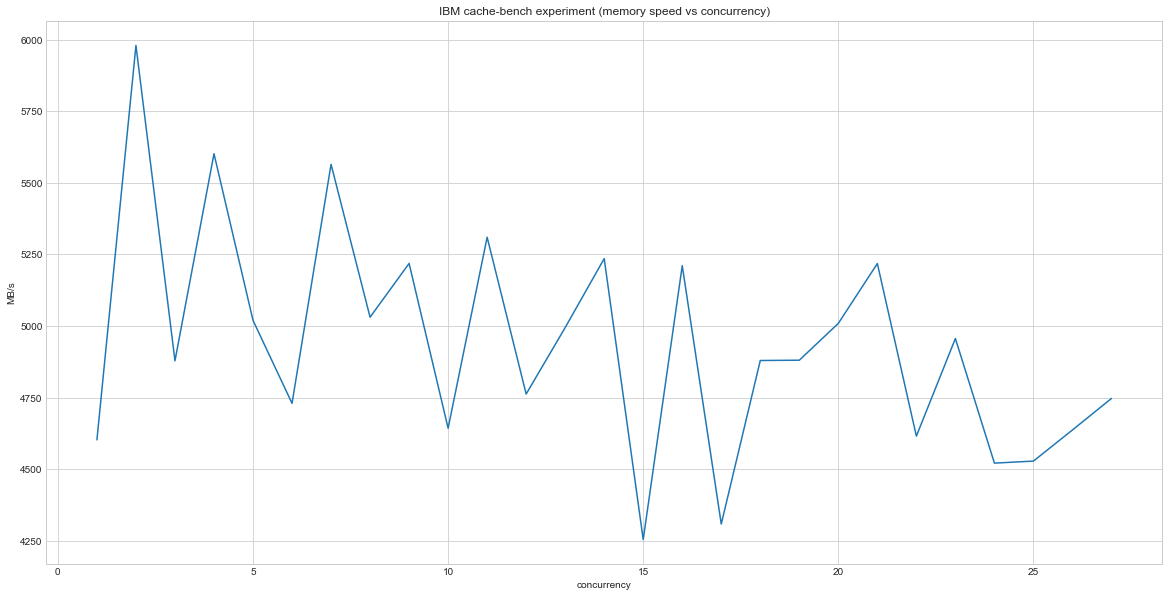

In [43]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range(1, 28), cache_bench_perf_df['cache-bench-perf'].to_list())
# plt.plot(y, x, label = "line 2")
# plt.legend()
plt.xlabel('concurrency')
plt.ylabel('MB/s')
plt.title('IBM cache-bench experiment (memory speed vs concurrency)')
plt.show()

In [30]:
cache_bench_perf_df = df.groupby('con').mean()

In [33]:
cache_bench_perf_df['cache-bench-perf'].to_list()

[4602.284000000001,
 5979.9310000000005,
 4878.442,
 5601.6405,
 5019.6424,
 4729.844666666667,
 5564.550571428571,
 5030.76225,
 5218.474222222222,
 4642.9398,
 5310.139272727272,
 4762.369333333333,
 4994.494307692307,
 5235.400571428572,
 4254.0536,
 5210.694125,
 4308.411058823529,
 4879.511333333333,
 4880.5262105263155,
 5009.0934,
 5218.012571428572,
 4615.438909090909,
 4956.1973913043485,
 4521.088916666667,
 4528.209760000001,
 4636.820769230769,
 4747.035037037037]

In [38]:
cache_bench_perf_df

runtime  cpuStealDelta  normalized_cpu_steal        vm  cache-bench-perf
con                                                                           
1    3.771300   22300.000000           5913.080370  1.000000       4602.284000
2    3.771383   27910.000000           7400.681498  1.500000       5979.931000
3    3.770900   22143.333333           5872.157815  1.000000       4878.442000
4    3.773292   35055.000000           9290.535619  1.500000       5601.640500
5    3.773460   25074.000000           6647.058598  1.600000       5019.642400
6    3.773983   18978.333333           5029.020625  1.500000       4729.844667
7    3.774264   27675.714286           7334.675435  2.000000       5564.550571
8    3.775417   18507.500000           4905.363296  1.750000       5030.762250
9    3.774400   14820.000000           3924.808094  2.555556       5218.474222
10   3.777182    7748.000000           2052.511689  2.600000       4642.939800
11   3.774020   23261.818182           6163.394776  2.818182       5310.139273
12   3.775707   20805.833333           5512.342646  2.916667       4762.369333
13   3.775835   12076.923077           3199.534140  2.538462       4994.494308
14   3.774345   14004.285714           3711.964939  3.000000       5235.400571
15   3.777939    1422.000000            376.371081  2.600000       4254.053600
16   3.776568   14760.000000           3911.206425  3.312500       5210.694125
17   3.777705    4927.647059           1305.718904  3.058824       4308.411059
18   3.775469    3293.888889            872.965409  3.055556       4879.511333
19   3.776110    4927.368421           1306.029759  3.105263       4880.526211
20   3.775296    9522.500000           2523.791216  3.550000       5009.093400
21   3.773634    8122.380952           2152.410302  3.476190       5218.012571
22   3.776439    8827.727273           2339.411152  3.863636       4615.438909
23   3.775214    6949.130435           1840.727912  3.652174       4956.197391
24   3.776565    5112.500000           1355.148063  3.958333       4521.088917
25   3.777348    2936.800000            778.357672  4.120000       4528.209760
26   3.777348    3496.923077            926.437935  3.769231       4636.820769
27   3.775925    7671.851852           2033.495490  4.296296       4747.035037

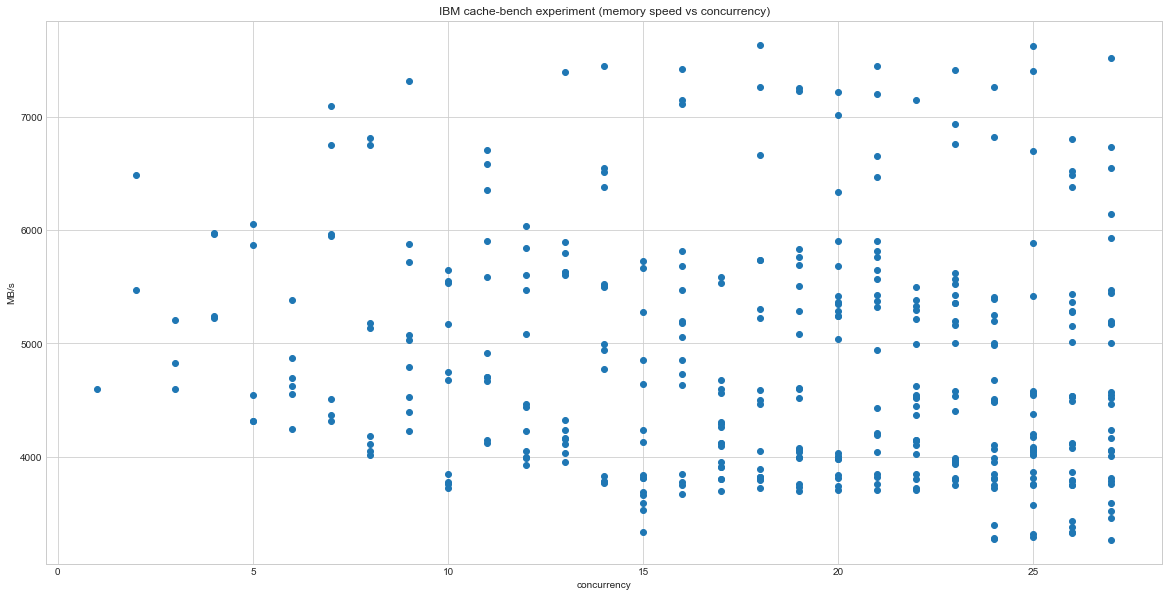

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df['con'].to_list(), df['cache-bench-perf'].to_list())
# plt.plot(y, x, label = "line 2")
# plt.legend()
plt.xlabel('concurrency')
plt.ylabel('MB/s')
plt.title('IBM cache-bench experiment (memory speed vs concurrency)')
plt.show()

In [44]:
df['con']

con                                     id  \
279    1  a6037d1a55f34db6837d1a55f3adb6ff.json   
102    2  29d07a03863f46e8907a03863f46e8ef.json   
317    2  47057d7ad9c74027857d7ad9c7b027e9.json   
65     3  0e23fe800c854e00a3fe800c853e0093.json   
260    3  a6037d1a55f34db6837d1a55f3adb6ff.json   
..   ...                                    ...   
344   27  5a5ee678ec56474b9ee678ec56b74bdd.json   
171   27  27b552b175ca4ad3b552b175cafad390.json   
2     27  3d72dfe92b0449beb2dfe92b04b9be3e.json   
266   27  0dc3747c43d94dc783747c43d98dc756.json   
33    27  06e9da086f4444afa9da086f4434af31.json   

                                             file_name  \
279  ./data/activations/1-a6037d1a55f34db6837d1a55f...   
102  ./data/activations/2-29d07a03863f46e8907a03863...   
317  ./data/activations/2-47057d7ad9c74027857d7ad9c...   
65   ./data/activations/3-0e23fe800c854e00a3fe800c8...   
260  ./data/activations/3-a6037d1a55f34db6837d1a55f...   
..                                                 ...   
344  ./data/activations/27-5a5ee678ec56474b9ee678ec...   
171  ./data/activations/27-27b552b175ca4ad3b552b175...   
2    ./data/activations/27-3d72dfe92b0449beb2dfe92b...   
266  ./data/activations/27-0dc3747c43d94dc783747c43...   
33   ./data/activations/27-06e9da086f4444afa9da086f...   

                                                output   runtime  \
279  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   
102  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.772017   
317  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770750   
65   {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.770817   
260  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.771300   
..                                                 ...       ...   
344  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.768717   
171  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.779767   
2    {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.776083   
266  {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.779533   
33   {'namespace': '0bf94102-e0e3-478b-ab0c-caa40f3...  3.776700   

                                     vmID  \
279  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
102  fe179955-ca23-6b5b-e3ec-7a2f71f08f36   
317  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
65   ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
260  ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
..                                    ...   
344  9ff64733-14fd-8d20-9a1b-fc66be30fad2   
171  134b7e5a-751b-2daf-cb0b-0180ff2b998e   
2    ad252dcb-23fc-700e-c2d6-c8ba429ba03f   
266  0631d9d0-10dc-ac49-7da5-e7416074c9cc   
33   ad252dcb-23fc-700e-c2d6-c8ba429ba03f   

                                     uuid  cpuStealDelta  \
279  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0   
102  d9529eb5-f7fa-4ed6-92e7-ad82aa558fab        23110.0   
317  22222861-2ff1-4fbe-b029-f95b6bf921c4        32710.0   
65   22222861-2ff1-4fbe-b029-f95b6bf921c4        22320.0   
260  91702e45-0683-4b7d-a15d-c3a9534e52f3        22300.0   
..                                    ...            ...   
344  3d101cac-161c-42e3-901f-b3e5743c6768        36600.0   
171  ab3c3858-e288-4994-9b5d-34e45d7944e7         1290.0   
2    ab184416-9e41-46fb-b2c0-99213f758e43         1030.0   
266  63b756d3-bde6-4732-a57c-f6cc0eafeabb          970.0   
33   e16d2c24-6c65-41bb-9054-109eb7ab3ead         1030.0   

     normalized_cpu_steal  vm  cache-bench-perf  
279           5913.080370   1          4602.284  
102           6126.696153   2          5472.382  
317           8674.666843   1          6487.480  
65            5919.142184   1          4828.698  
260           5913.080370   1          4602.284  
..                    ...  ..               ...  
344           9711.528681   9          6138.090  
171            341.290909   6          3522.426  
2              272.769404   1          4162.434  
266            256.645441   3          4468.298  
33             272.724866   1          4062.082  

[378 rows x 11 

In [21]:
df['vmID']

279    ad252dcb-23fc-700e-c2d6-c8ba429ba03f
102    fe179955-ca23-6b5b-e3ec-7a2f71f08f36
317    ad252dcb-23fc-700e-c2d6-c8ba429ba03f
65     ad252dcb-23fc-700e-c2d6-c8ba429ba03f
260    ad252dcb-23fc-700e-c2d6-c8ba429ba03f
                       ...                 
344    9ff64733-14fd-8d20-9a1b-fc66be30fad2
171    134b7e5a-751b-2daf-cb0b-0180ff2b998e
2      ad252dcb-23fc-700e-c2d6-c8ba429ba03f
266    0631d9d0-10dc-ac49-7da5-e7416074c9cc
33     ad252dcb-23fc-700e-c2d6-c8ba429ba03f
Name: vmID, Length: 378, dtype: object

In [22]:
vm_dict = dict()
vm_counter = 1
for vm in df['vmID']:
    if vm not in vm_dict:
        vm_dict[vm] = vm_counter
        vm_counter += 1
len(vm_dict)

9

In [23]:
df['vm'] = df['vmID'].apply(lambda i: vm_dict[i])

In [24]:
r = dict(Counter(df[df['vm'] == 4]['con']))

In [25]:
r

{9: 1,
 13: 1,
 14: 1,
 16: 1,
 18: 2,
 19: 2,
 20: 2,
 21: 4,
 23: 3,
 24: 1,
 25: 2,
 26: 4,
 27: 2}

In [28]:
list(r.keys())

[9, 13, 14, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27]

In [29]:

list(r.values())

[1, 1, 1, 1, 2, 2, 2, 4, 3, 1, 2, 4, 2]

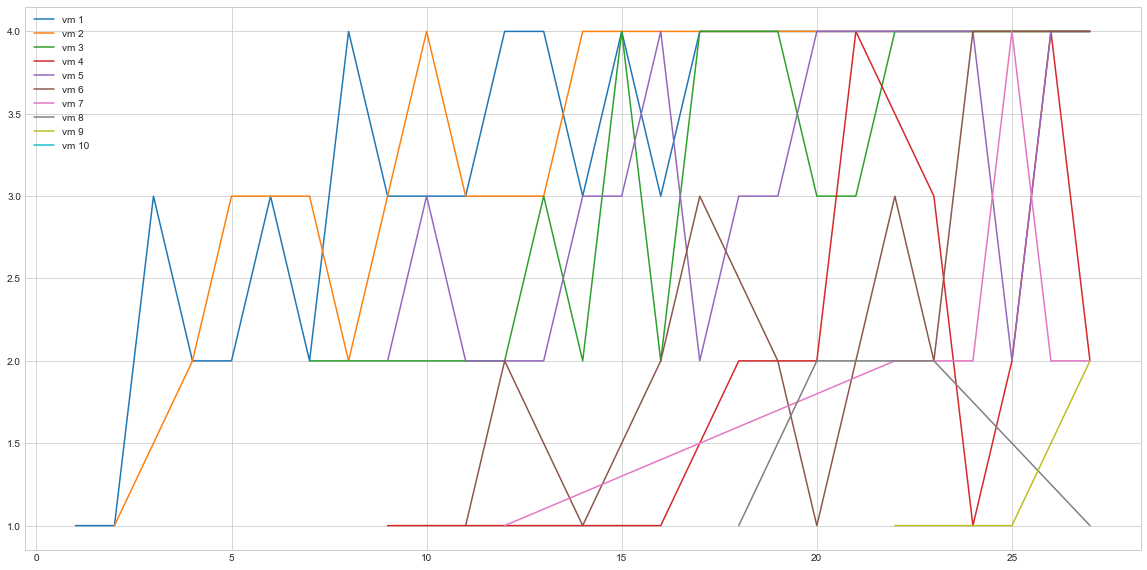

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
for i in range(1, 11):
    r = dict(Counter(df[df['vm'] == i]['con']))
    plt.plot(list(r.keys()), list(r.values()), label='vm {}'.format(i))

plt.legend()
plt.show()

In [31]:
df_con = list(df.groupby('con'))

In [32]:
df_con[15][1].groupby('vm').mean()

con   runtime  cpuStealDelta  normalized_cpu_steal
vm                                                     
1   16.0  3.775972   25606.666667           6781.479084
2   16.0  3.780850     822.500000            217.545352
3   16.0  3.772150   41190.000000          10919.501984
4   16.0  3.768083    1540.000000            408.695844
5   16.0  3.778850     320.000000             84.681936
6   16.0  3.772992   35425.000000           9389.128292

In [33]:
count_df_5 = df_con[5][1].groupby('vm').count()

In [34]:
avg_df_5 = df_con[5][1].groupby('vm').mean()

In [35]:
avg_df_5

con   runtime  cpuStealDelta  normalized_cpu_steal
vm                                                    
1   6.0  3.772078   21263.333333           5637.010552
2   6.0  3.775889   16693.333333           4421.030698

In [36]:
count_df_5['cpuStealAvg'] = avg_df_5['normalized_cpu_steal']

In [37]:
count_df_5 = count_df_5[['normalized_cpu_steal', 'cpuStealAvg']]
count_df_5.columns = ['count', 'cpuStealAvg']

In [38]:
count_df_5

count  cpuStealAvg
vm                    
1       3  5637.010552
2       3  4421.030698

In [39]:
count_df_list = []
for i, d in df_con:
    count_df = d.groupby('vm').count()
    avg_df = d.groupby('vm').mean()
    count_df['cpuStealAvg'] = avg_df['normalized_cpu_steal']
    count_df = count_df[['normalized_cpu_steal', 'cpuStealAvg']]
    count_df.columns = ['count', 'cpuStealAvg']
    count_df_list.append(count_df)

In [40]:
count_df_list[0]

count  cpuStealAvg
vm                    
1       1   5913.08037

In [41]:
count_df_list[4]

count  cpuStealAvg
vm                    
1       2  9929.386704
2       3  4458.839861

In [42]:
count_df = pd.concat(count_df_list)

In [43]:
count_df.sort_values('count', inplace=True)

In [44]:
count_df.groupby('count').mean()

cpuStealAvg
count             
1      6465.858644
2      6852.562883
3      4569.003770
4       269.926811

In [45]:
count_df

count   cpuStealAvg
vm                     
1       1   5913.080370
9       1  10004.201588
9       1   8150.032068
4       1    413.608424
9       1   8595.167099
..    ...           ...
5       4     93.402892
1       4    230.300983
2       4    281.096350
3       4    327.965268
2       4    238.672384

[130 rows x 2 columns]

In [47]:
df[['con', 'normalized_cpu_steal']]

con  normalized_cpu_steal
279    1           5913.080370
102    2           6126.696153
317    2           8674.666843
65     3           5919.142184
260    3           5913.080370
..   ...                   ...
344   27           9711.528681
171   27            341.290909
2     27            272.769404
266   27            256.645441
33    27            272.724866

[378 rows x 2 columns]